In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
filename = 'data/lens_z_omlambda_0.0.csv'
filename = 'data/dopri5_lens_z_omlambda_0.0.csv'
df = pd.read_csv(filename)
df.head()

,lens_z,percentage_err,step
0,0.05,-0.003992,1.000000e-07
1,0.20,-0.001169,1.000000e-07
2,0.05,-0.004343,1.183673e-07
3,0.20,-0.001726,1.183673e-07
4,0.05,-0.004006,1.367347e-07


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
stats

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
1.000000e-07,-0.002580,0.001996,2,0.001411
1.183673e-07,-0.003035,0.001851,2,0.001309
1.367347e-07,-0.003024,0.001389,2,0.000982
1.551020e-07,-0.005289,0.000935,2,0.000661
1.734694e-07,-0.003221,0.001111,2,0.000785
1.918367e-07,-0.003839,0.000767,2,0.000542
2.102041e-07,-0.004620,0.000124,2,0.000087
2.285714e-07,-0.004002,0.001688,2,0.001194
2.469388e-07,-0.006598,0.001772,2,0.001253


In [5]:
# stats[stats['percentage_err mean'].abs() == stats['percentage_err mean'].abs().min()]
best_step_size = stats['percentage_err mean'].abs().idxmin()
print("This is the step size that gives the most accurate result: ", best_step_size)
print("This step size has mean of ", stats['percentage_err mean'].abs().min())

This is the step size that gives the most accurate result:  9.63265306122e-07
This step size has mean of  0.000175297364862


In [6]:
stats[stats.index > 6e-7]

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
6.142857e-07,0.005050,0.012459,2,0.008810
6.326531e-07,0.006276,0.013351,2,0.009440
6.510204e-07,0.004752,0.013506,2,0.009550
6.693878e-07,-0.003449,0.001742,2,0.001232
6.877551e-07,0.001481,0.005053,2,0.003573
7.061224e-07,-0.001736,0.001184,2,0.000837
7.244898e-07,0.000622,0.008261,2,0.005841
7.428571e-07,0.003280,0.008699,2,0.006151
7.612245e-07,0.001529,0.008238,2,0.005825


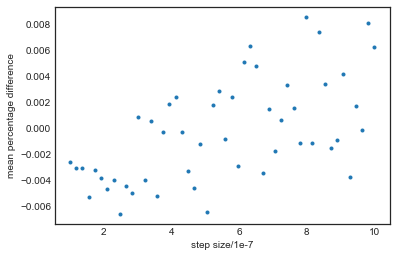

In [7]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('mean percentage difference')

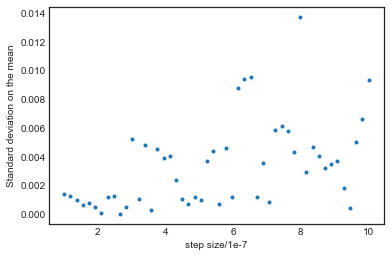

In [8]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('Standard deviation on the mean')

In [9]:
# filename = 'data/mass_omlambda_0.0.csv'
# df = pd.read_csv(filename)
# df.drop_duplicates(inplace=True)
# stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
# stats.columns = [' '.join(col).strip() for col in stats.columns.values]
# stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
# stats

In [10]:
# plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].abs().values, '.')
# plt.xlabel('step size/1e-7')
# plt.ylabel('mean percentage difference')

In [11]:
# plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
# plt.xlabel('step size/1e-7')
# plt.ylabel('Standard deviation on the mean')